In [2]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
#Initializing NLTK resources
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Loading dataset
df = pd.read_csv('Spam_Dataset.csv',encoding ='latin-1')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print('Shape of the dataset:',df.shape)
print("Missing Values",df.isnull().sum())
print("Zero values",(df==0).sum())
print("NA values",df.isna().sum())


Shape of the dataset: (5572, 2)
Missing Values Category    0
Message     0
dtype: int64
Zero values Category    0
Message     0
dtype: int64
NA values Category    0
Message     0
dtype: int64


In [6]:
#Text preprocessing function
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z]", " ", text) #For removing non-alphabatical characters
    words = [ps.stem(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

df['Cleaned_message'] = df['Message'].apply(preprocess_text)

df[['Message','Cleaned_message']].head()

,Message,Cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [7]:
df.columns.tolist()

['Category', 'Message', 'Cleaned_message']

In [8]:
#Encoding labels for models
df['label_num'] = df['Category'].map({'ham': 0, 'spam': 1})
X = df['Cleaned_message']
y = df['label_num']

In [9]:
#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

X_train: (4457,)
X_test: (1115,)
y_train: (4457,)
y_test: (1115,)


In [10]:
#Feature extraction with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [33]:
#Training Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

nb = MultinomialNB(alpha=0.5,fit_prior=True)
lr = LogisticRegression(C=1.0,penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
svc = LinearSVC(penalty='l2',C=0.8,max_iter=3000,class_weight='balanced')
dt = DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_split=10,min_samples_leaf=5,random_state=42,class_weight='balanced')
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',max_depth=25,min_samples_split=8,min_samples_leaf=4,max_features='sqrt',random_state=42,n_jobs=-1)


In [34]:
nb.fit(X_train_tfidf, y_train)

,alpha,0.5
,force_alpha,True
,fit_prior,True
,class_prior,None


In [35]:
lr.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
svc.fit(X_train_tfidf, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,0.8
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,None


In [37]:
dt.fit(X_train_tfidf, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [38]:
rf.fit(X_train_tfidf, y_train)

,n_estimators,1000
,criterion,'entropy'
,max_depth,25
,min_samples_split,8
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
#Making predictions
y_pred_nb = nb.predict(X_test_tfidf)
y_pred_lr = lr.predict(X_test_tfidf)
y_pred_svc = svc.predict(X_test_tfidf)
y_pred_dt = dt.predict(X_test_tfidf)
y_pred_rf = rf.predict(X_test_tfidf)

In [40]:
y_prob_nb = nb.predict_proba(X_test_tfidf)
y_prob_lr = lr.predict_proba(X_test_tfidf)
y_prob_scv = svc.decision_function(X_test_tfidf)
y_prob_dt = dt.predict_proba(X_test_tfidf)
y_prob_rf = rf.predict_proba(X_test_tfidf)

In [41]:
#evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, f1_score


def evaluate_model(model,y_true, y_pred):
    #Accuracy score
    acc_score  = accuracy_score(y_true, y_pred)
    print(f"{model} Accuracy: {acc_score:.4f}\n")

    #F1-score
    print(f"F1-score {model}:{f1_score(y_true,y_pred,average='weighted'):.4f}\n")

    #Classification Report
    print(f"Classification Report({model}):{classification_report(y_true, y_pred,target_names=['Ham','Spam'])}")





In [42]:
evaluate_model('Naive Bayes',y_test,y_pred_nb)

Naive Bayes Accuracy: 0.9785

F1-score Naive Bayes:0.9777

Classification Report(Naive Bayes):              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       0.99      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [43]:
evaluate_model('Logistic Regression',y_test,y_pred_lr)

Logistic Regression Accuracy: 0.9812

F1-score Logistic Regression:0.9811

Classification Report(Logistic Regression):              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.94      0.92      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [44]:
evaluate_model('SVC',y_test,y_pred_svc)

SVC Accuracy: 0.9821

F1-score SVC:0.9819

Classification Report(SVC):              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.95      0.91      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [45]:
evaluate_model('Decision Tree',y_test,y_pred_dt)

Decision Tree Accuracy: 0.9372

F1-score Decision Tree:0.9397

Classification Report(Decision Tree):              precision    recall  f1-score   support

         Ham       0.98      0.95      0.96       966
        Spam       0.72      0.87      0.79       149

    accuracy                           0.94      1115
   macro avg       0.85      0.91      0.88      1115
weighted avg       0.94      0.94      0.94      1115



In [46]:
evaluate_model('Random Forest',y_test,y_pred_rf)

Random Forest Accuracy: 0.9587

F1-score Random Forest:0.9555

Classification Report(Random Forest):              precision    recall  f1-score   support

         Ham       0.95      1.00      0.98       966
        Spam       1.00      0.69      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



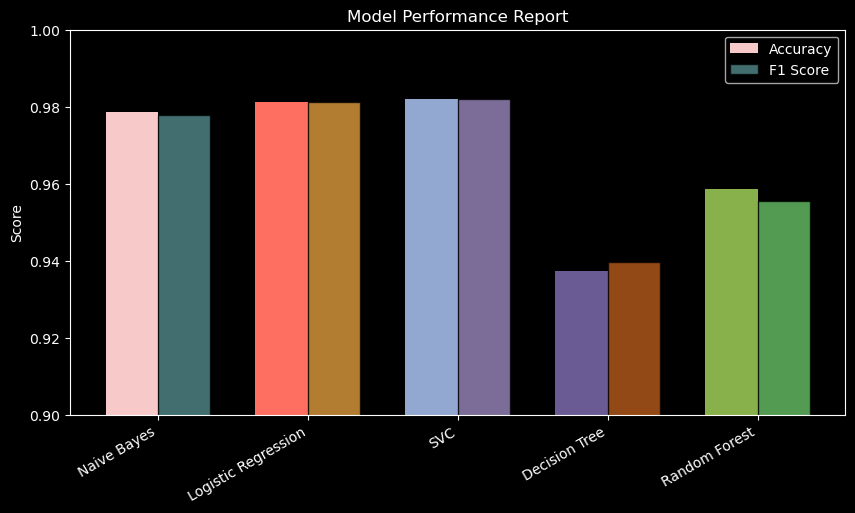

In [47]:
#Model Performance Comparison
colors_acc = {
    'Naive Bayes':'#F7CAC9',
    'Logistic Regression':'#FF6F61',
    'SVC':'#92A8D1',
    'Decision Tree':'#6B5B95',
    'Random Forest':'#88B04B'
}

colors_f1 = {
    'Naive Bayes':'#5F9EA0',
    'Logistic Regression':'#FFB347',
    'SVC':'#B19CD9',
    'Decision Tree':'#D2691E',      # fixed
    'Random Forest':'#77DD77'       # fixed
}


models =['Naive Bayes', 'Logistic Regression','SVC' ,'Decision Tree', 'Random Forest']

accuracy      = [0.9785,0.9812,0.9821,0.9372,0.9587]
f1_score_each = [0.9777,0.9811,0.9819,0.9397,0.9555]
x = np.arange(len(models))


bar_width =0.35
plt.style.use('dark_background')
plt.figure(figsize=(10,5))

plt.bar(x - bar_width/2, accuracy, width=bar_width, label='Accuracy',color=[colors_acc[m] for m in models])

plt.bar(x + bar_width/2,f1_score_each,bar_width,label='F1 Score',edgecolor ='black',alpha=0.7,color=[colors_f1[m] for m in models])


plt.xticks(x,models,rotation=30,ha='right')
plt.ylabel('Score')
plt.ylim(0.9,1.0)
plt.title('Model Performance Report')
plt.legend()

plt.show()


In [51]:
print("Sample probabilities (LR):", lr.predict_proba(X_test_tfidf)[:5])


Sample probabilities (LR): [[0.93034511 0.06965489]
 [0.93294327 0.06705673]
 [0.96957645 0.03042355]
 [0.01212573 0.98787427]
 [0.76851596 0.23148404]]


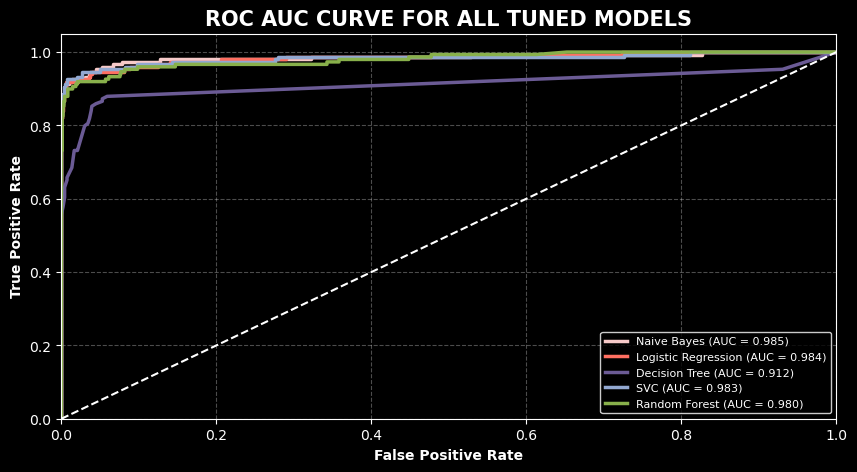

In [49]:
# ROC CURVES FOR ALL MODELS

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models_stratified = {
    'Naive Bayes': nb,
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'SVC': svc,
    'Random Forest': rf
}

# colors for plotting
colors = {
    'Naive Bayes': '#F7CAC9',
    'Logistic Regression': '#FF6F61',
    'SVC': '#92A8D1',
    'Decision Tree': '#6B5B95',
    'Random Forest': '#88B04B'
}

plt.style.use('dark_background')
plt.figure(figsize=(10, 5))

for name, model in models_stratified.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_tfidf)[:, 1]
    else:
        y_score = model.decision_function(X_test_tfidf)

    # computing ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # plotting curve
    plt.plot(fpr, tpr, color=colors[name], lw=2.5,
             label=f"{name} (AUC = {roc_auc:.3f})")

# reference diagonal line
plt.plot([0, 1], [0, 1], 'w--', lw=1.5)

# formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=10, fontweight='bold')
plt.title("ROC AUC CURVE FOR ALL TUNED MODELS", fontsize=15, fontweight='bold')
plt.legend(fontsize=8, loc='lower right', frameon=True,
           facecolor='black', edgecolor='white')
plt.grid(alpha=0.3,linestyle='--')

plt.show()


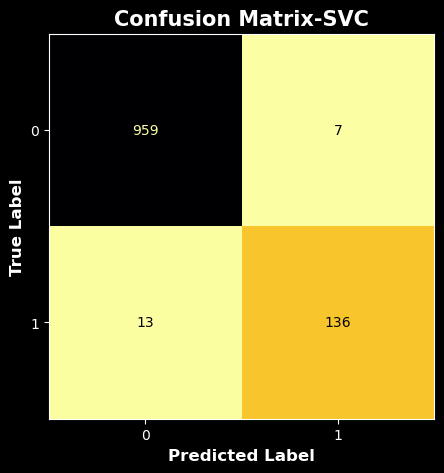

In [50]:
#Confusion Matrix for the best model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)

plt.style.use('dark_background')
fig,ax = plt.subplots(figsize=(6,5))
disp.plot(cmap='inferno_r', values_format='d',ax=ax,colorbar=False)

plt.title('Confusion Matrix-SVC', fontsize=15, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.show()
